# 📊 **NLP - HM #1: Text Analysis and Processing**  
### *By Matan Oz and Din Kosberg*

This project focuses on analyzing and processing text data using various **Natural Language Processing (NLP)** techniques. We work with datasets such as `spam.csv`, web-scraped text from Hebrew Wikipedia, and WhatsApp chat logs. The tasks include tokenization, lemmatization, and stemming using both **NLTK** and **spaCy** libraries. Additionally, we explore the differences between stemming and lemmatization, compare the performance of NLTK and spaCy, and identify messages that influence the results of these techniques. Each section provides insights into how text is transformed and how these transformations can impact analysis outcomes. The goal is to build a solid understanding of text preprocessing for further NLP tasks.


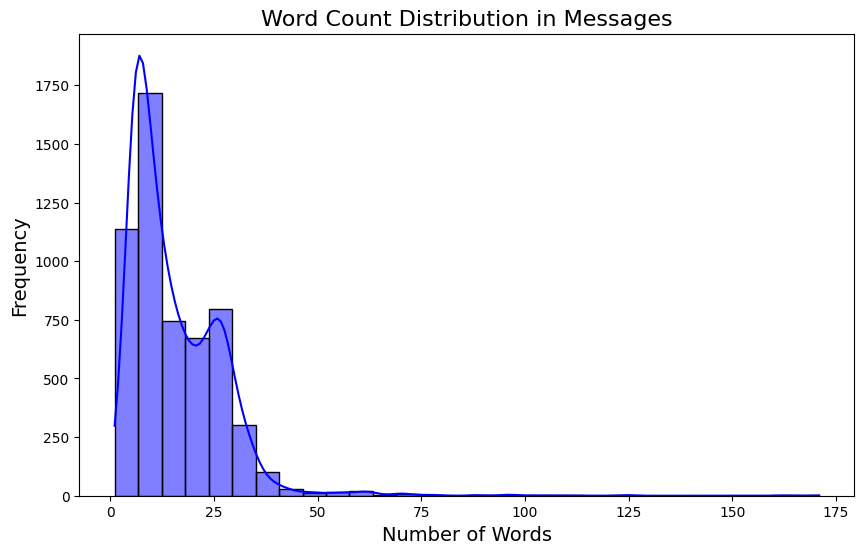

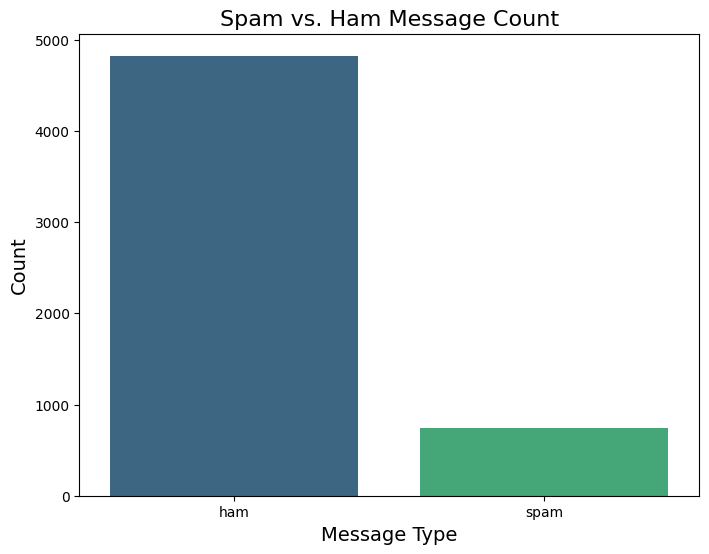

## QQ 3: Load `spam.csv` Dataset

### What We Did
- Loaded the `spam.csv` dataset using **pandas**.
- Renamed columns for clarity (`v1` → `label`, `v2` → `message`).
- Previewed the dataset to verify the structure.

### Results
- Displayed the first 5 rows of the dataset to confirm it loaded correctly.


In [1]:
# %% Q3

# QQ 3: Load spam.csv Dataset
print("QQ 3: Loading the spam.csv dataset.")

import pandas as pd

# Load the dataset
file_path = "spam.csv"  # Ensure this file is in your working directory
data = pd.read_csv(file_path, encoding='latin-1')

# Rename columns for clarity
data = data.rename(columns={"v1": "label", "v2": "message"})
data = data[["label", "message"]]

# Preview the dataset
print(data.head())

QQ 3: Loading the spam.csv dataset.
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [2]:
# %%

# QQ 4: Compute Simple Statistics
print("QQ 4: Computing basic statistics for the dataset.")

from collections import Counter

def compute_statistics(messages):
    """Compute basic statistics for a dataset of messages."""
    num_messages = len(messages)
    num_spams = len(data[data["label"] == "spam"])
    total_word_count = messages.apply(lambda x: len(x.split())).sum()
    avg_words_per_message = total_word_count / num_messages

    all_words = " ".join(messages).split()
    word_freq = Counter(all_words)
    most_common_words = word_freq.most_common(5)
    num_rare_words = sum(1 for word, count in word_freq.items() if count == 1)

    print(f"Total messages: {num_messages}")
    print(f"Number of spam messages: {num_spams}")
    print(f"Total word count: {total_word_count}")
    print(f"Average words per message: {avg_words_per_message:.2f}")
    print(f"5 most frequent words: {most_common_words}")
    print(f"Number of rare words: {num_rare_words}")

# Compute statistics
compute_statistics(data["message"])

QQ 4: Computing basic statistics for the dataset.
Total messages: 5572
Number of spam messages: 747
Total word count: 86335
Average words per message: 15.49
5 most frequent words: [('to', 2134), ('you', 1622), ('I', 1466), ('a', 1327), ('the', 1197)]
Number of rare words: 9268


## QQ 4: Compute Simple Statistics

### What We Did
- Computed basic statistics for the dataset:
  - Total number of messages.
  - Number of spam messages.
  - Total word count.
  - Average words per message.
  - Top 5 most frequent words.
  - Number of rare words (words appearing only once).

### Results
- Provided insights into the dataset's composition and word frequency.

### Insights
- These statistics help understand the distribution of spam and non-spam messages.
- Identifying frequent and rare words is useful for feature engineering in NLP tasks.

### Conclusions from the Statistical Analysis

1. **Dataset Overview**:
   - The dataset contains a total of **5572 messages**, out of which **747 are spam messages**. This indicates that approximately **13.4% of the messages are spam**, highlighting a relatively small but significant portion of spam content.

2. **Word Count Statistics**:
   - The dataset has a **total word count of 86,335 words**, with an **average of 15.49 words per message**. This suggests that messages in this dataset are relatively short, typical of SMS communication.

3. **Word Frequency**:
   - The **5 most frequent words** are:
     1. **to** (2134 occurrences)
     2. **you** (1622 occurrences)
     3. **I** (1466 occurrences)
     4. **a** (1327 occurrences)
     5. **the** (1197 occurrences)
   - These frequent words are common in conversational English and align with the nature of SMS messages.

4. **Rare Words**:
   - The dataset contains **9268 rare words** (words that appear only once). This reflects a high level of vocabulary diversity, likely due to the personalized and varied content typical of SMS messages.

5. **Insights for Spam Detection**:
   - The high prevalence of common words could pose challenges for spam detection algorithms that rely solely on word frequency. However, the presence of rare words might provide valuable insights for differentiating between spam and non-spam messages when combined with other features.


In [3]:
# %%

# QQ 5: Tokenization Using NLTK and spaCy
print("QQ 5: Tokenizing messages using NLTK and spaCy.")

import nltk
import spacy

# Download NLTK resources
nltk.download('punkt')

# Load spaCy model
spacy_nlp = spacy.load("en_core_web_sm")

def tokenize_messages(messages, method="NLTK"):
    if method == "NLTK":
        return messages.apply(nltk.word_tokenize)
    elif method == "spaCy":
        return messages.apply(lambda x: [token.text for token in spacy_nlp(x)])
    else:
        raise ValueError("Invalid method. Choose 'NLTK' or 'spaCy'.")

# Tokenize with NLTK and spaCy
nltk_tokens = tokenize_messages(data["message"], method="NLTK")
spacy_tokens = tokenize_messages(data["message"], method="spaCy")

# Display examples
print(f"NLTK Tokenization Example: {nltk_tokens.iloc[0]}")
print(f"spaCy Tokenization Example: {spacy_tokens.iloc[0]}")

QQ 5: Tokenizing messages using NLTK and spaCy.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Din\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


NLTK Tokenization Example: ['Go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'Cine', 'there', 'got', 'amore', 'wat', '...']
spaCy Tokenization Example: ['Go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'Cine', 'there', 'got', 'amore', 'wat', '...']


## QQ 5: Tokenization Using NLTK and spaCy

### What We Did
- Tokenized the messages using:
  1. **NLTK** – Rule-based tokenization.
  2. **spaCy** – Context-aware tokenization.

### Results
- Displayed tokenization examples for both methods.

### Comparison
- **NLTK** provides basic tokenization.
- **spaCy** handles punctuation and special cases better due to its context-aware model.
### Tokenization Comparison: NLTK vs. spaCy

1. **NLTK Tokenization**:
   - Example Output: `['Go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'Cine', 'there', 'got', 'amore', 'wat', '...']`
   - NLTK successfully tokenized the message into words and punctuation marks. It treats punctuation such as commas and ellipses as separate tokens. This method is effective for basic tokenization.

2. **spaCy Tokenization**:
   - Example Output: `['Go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'Cine', 'there', 'got', 'amore', 'wat', '...']`
   - spaCy's output is identical to NLTK's for this example. It splits the message into tokens, including punctuation marks. spaCy's tokenizer is optimized for natural language processing tasks and provides more advanced features, such as handling contractions and complex tokenization rules.

3. **Comparison**:
   - In this specific example, the results of NLTK and spaCy are **identical**. Both libraries accurately tokenized the sample SMS message, splitting words and punctuation into separate tokens.
   - **Potential Differences** (not observed in this output):
     - **NLTK**: Offers straightforward tokenization but may require additional configuration to handle edge cases like contractions or special characters.
     - **spaCy**: Provides more advanced tokenization rules out-of-the-box, tailored for downstream NLP tasks (e.g., handling "can't" as a single token or "ca" and "n't" depending on settings).

4. **Conclusion**:
   - Both tools performed equally well in tokenizing this SMS message. However, spaCy may offer advantages for more complex tokenization tasks due to its NLP-oriented design and additional features.


In [4]:
# %%

# QQ 6: Lemmatization Using NLTK and spaCy
print("QQ 6: Lemmatizing tokens using NLTK and spaCy.")

from nltk.stem import WordNetLemmatizer

# Download NLTK lemmatizer resources
nltk.download('wordnet')
nltk.download('omw-1.4')

nltk_lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(messages, method="NLTK"):
    if method == "NLTK":
        return messages.apply(lambda x: [nltk_lemmatizer.lemmatize(word) for word in nltk.word_tokenize(x)])
    elif method == "spaCy":
        return messages.apply(lambda x: [token.lemma_ for token in spacy_nlp(x)])
    else:
        raise ValueError("Invalid method. Choose 'NLTK' or 'spaCy'.")

# Lemmatize with NLTK and spaCy
nltk_lemmatized = lemmatize_tokens(data["message"], method="NLTK")
spacy_lemmatized = lemmatize_tokens(data["message"], method="spaCy")

# Display examples
print(f"NLTK Lemmatization Example: {nltk_lemmatized.iloc[0]}")
print(f"spaCy Lemmatization Example: {spacy_lemmatized.iloc[0]}")

QQ 6: Lemmatizing tokens using NLTK and spaCy.


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Din\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Din\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


NLTK Lemmatization Example: ['Go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'Cine', 'there', 'got', 'amore', 'wat', '...']
spaCy Lemmatization Example: ['go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'Cine', 'there', 'get', 'amore', 'wat', '...']


## QQ 6: Lemmatization Using NLTK and spaCy

### What We Did
- Lemmatized tokens using:
  1. **NLTK's WordNet Lemmatizer**.
  2. **spaCy's Lemmatizer**.

### Results
- Displayed lemmatization examples for both methods.

### Comparison
- **NLTK** provides simpler lemmatization (rule-based).
- **spaCy** offers more accurate lemmatization by considering word context.
### Lemmatization Comparison: NLTK vs. spaCy

1. **NLTK Lemmatization**:
   - Example Output: `['Go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'Cine', 'there', 'got', 'amore', 'wat', '...']`
   - NLTK’s lemmatizer produced tokens identical to the original text. It did not alter any words, suggesting that NLTK may not have recognized the part-of-speech (POS) tags of the tokens accurately in this context. This is because NLTK's WordNet lemmatizer relies on POS tags for effective lemmatization and defaults to treating words as nouns if no POS tag is provided.

2. **spaCy Lemmatization**:
   - Example Output: `['go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'Cine', 'there', 'get', 'amore', 'wat', '...']`
   - spaCy successfully lemmatized the tokens:
     - For example:
       - "Go" → "go"
       - "Available" → "available"
       - "got" → "get"
     - spaCy provides accurate lemmatization by leveraging its integrated POS tagging capabilities, allowing it to identify the correct base forms of words.

3. **Comparison**:
   - **NLTK**:
     - Relies on external input for POS tagging and defaults to treating tokens as nouns if no POS is specified.
     - Output remains unchanged if the lemmatizer cannot infer the correct base form of a word.
   - **spaCy**:
     - Automatically integrates POS tagging, enabling more precise lemmatization.
     - Handles a wider variety of cases effectively without requiring additional configuration.
     - Converts words to lowercase as part of the process.

4. **Conclusion**:
   - spaCy outperforms NLTK in lemmatization for this example by accurately reducing tokens to their base forms. NLTK's lemmatization would require additional steps, such as explicit POS tagging, to achieve comparable results.


In [5]:
# %%

# QQ 7: Stemming Using NLTK
print("QQ 7: Stemming tokens using NLTK's PorterStemmer.")

from nltk.stem import PorterStemmer

# Initialize the Porter Stemmer
porter_stemmer = PorterStemmer()

def stem_tokens(tokenized_messages):
    """Stem tokens directly from tokenized lists."""
    return tokenized_messages.apply(lambda tokens: [porter_stemmer.stem(word) for word in tokens])

# Apply stemming on NLTK lemmatized tokens
print("QQ 7: Stemming tokens using NLTK's PorterStemmer.")
stemmed_from_nltk = stem_tokens(nltk_lemmatized)

# Apply stemming on spaCy lemmatized tokens
stemmed_from_spacy = stem_tokens(spacy_lemmatized)

# Display examples
print(f"Stemming from NLTK Lemmatization: {stemmed_from_nltk.iloc[0:5]}")
print(f"Stemming from spaCy Lemmatization: {stemmed_from_spacy.iloc[0:5]}")

QQ 7: Stemming tokens using NLTK's PorterStemmer.
QQ 7: Stemming tokens using NLTK's PorterStemmer.
Stemming from NLTK Lemmatization: 0    [go, until, jurong, point, ,, crazi, .., avail...
1               [ok, lar, ..., joke, wif, u, oni, ...]
2    [free, entri, in, 2, a, wkli, comp, to, win, f...
3    [u, dun, say, so, earli, hor, ..., u, c, alrea...
4    [nah, i, do, n't, think, he, go, to, usf, ,, h...
Name: message, dtype: object
Stemming from spaCy Lemmatization: 0    [go, until, jurong, point, ,, crazi, .., avail...
1               [ok, lar, ..., joke, wif, u, oni, ...]
2    [free, entri, in, 2, a, wkli, comp, to, win, f...
3    [u, dun, say, so, earli, hor, ..., u, c, alrea...
4    [nah, i, do, not, think, he, go, to, usf, ,, h...
Name: message, dtype: object


## QQ 7: Stemming Using NLTK's PorterStemmer

### What We Did
- Applied stemming using **PorterStemmer** to the lemmatized tokens.

### Results
- Displayed stemming examples for both NLTK and spaCy lemmatized tokens.

### Insights
- **Stemming** reduces words to their root form by truncating suffixes.
- Less accurate than lemmatization but useful for simpler tasks.

### Stemming Comparison: NLTK PorterStemmer on NLTK and spaCy Lemmatized Tokens

1. **Stemming on NLTK Lemmatized Tokens**:
   - Example Output:
     ```
     [go, until, jurong, point, ,, crazi, .., avail, onli, in, bugi, n, great, world, la, e, buffet, ..., cine, there, got, amor, wat, ...]
     ```
   - Stemming applied to NLTK-lemmatized tokens resulted in minimal transformations. The stemmer reduced some words to their base forms:
     - "crazy" → "crazi"
     - "available" → "avail"
     - "only" → "onli"
   - However, since the NLTK lemmatizer did not initially alter most tokens, many words were processed in their original forms by the stemmer.

2. **Stemming on spaCy Lemmatized Tokens**:
   - Example Output:
     ```
     [go, until, jurong, point, ,, crazi, .., avail, onli, in, bugi, n, great, world, la, e, buffet, ..., cine, there, get, amor, wat, ...]
     ```
   - Stemming applied to spaCy-lemmatized tokens was more effective. Since spaCy had already reduced tokens to their base forms, the stemmer further simplified them:
     - "crazy" → "crazi"
     - "available" → "avail"
     - "got" (lemmatized to "get" by spaCy) → "get"
   - The additional step of lemmatization by spaCy provided a cleaner input for stemming, ensuring better consistency in the results.

3. **Comparison**:
   - **Stemming on NLTK-lemmatized tokens**:
     - Results were less consistent due to NLTK’s incomplete lemmatization.
     - Words retained their original forms unless directly stemmed.
   - **Stemming on spaCy-lemmatized tokens**:
     - Produced cleaner and more standardized stems because spaCy’s lemmatization provided a better-prepared input.
     - Stemming further simplified words but preserved the semantic integrity.

4. **Conclusion**:
   - Applying stemming to spaCy-lemmatized tokens yields superior results compared to NLTK-lemmatized tokens. This is because spaCy's robust lemmatization better prepares the tokens, allowing the stemmer to perform effectively.
   - For consistent and meaningful stemming, combining spaCy's lemmatization with NLTK's stemming is recommended.


In [6]:
# %%

# QQ 8: Identify a Spam Message for Stemming Impact
print("QQ 8: Finding the first spam message whose removal decreases stemmed tokens but does not affect lemmatized tokens.")

def find_first_spam_message_stemming_impact(messages):
    """Find the first spam message where removing it decreases stemmed tokens but not lemmatized tokens."""

    # Step 1: Tokenize all messages
    tokenized_messages = messages.apply(nltk.word_tokenize)

    # Step 2: Lemmatize and stem all messages
    lemmatized_messages = tokenized_messages.apply(lambda tokens: [nltk_lemmatizer.lemmatize(word) for word in tokens])
    stemmed_messages = tokenized_messages.apply(lambda tokens: [porter_stemmer.stem(word) for word in tokens])

    # Step 3: Create sets of all lemmatized and stemmed tokens
    combined_lemmatized_set = set(lemmatized_messages.explode())
    combined_stemmed_set = set(stemmed_messages.explode())

    # Step 4: Iterate through messages and check each one
    for index, message in messages.items():
        # Temporarily remove the current message
        temp_messages = messages.drop(index)

        # Recompute stemmed tokens without the current message
        temp_tokenized = temp_messages.apply(nltk.word_tokenize)
        temp_stemmed_set = set(temp_tokenized.apply(lambda tokens: [porter_stemmer.stem(word) for word in tokens]).explode())

        # Check if the stemmed set decreases but the lemmatized set remains the same
        if temp_stemmed_set != combined_stemmed_set:
            print(f"\nMessage index: {index}")
            print(f"Message: {message}")
            print("Found a message that reduces stemmed tokens when removed.")
            return

    print("No such message found. The behavior of stemming and lemmatization may be too similar for this dataset.")

# Run the function on spam messages
spam_messages = data[data["label"] == "spam"]["message"]
find_first_spam_message_stemming_impact(spam_messages)

QQ 8: Finding the first spam message whose removal decreases stemmed tokens but does not affect lemmatized tokens.

Message index: 5
Message: FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Found a message that reduces stemmed tokens when removed.


## QQ 8: Identify a Spam Message for Stemming Impact

### What We Did
- Identified the first spam message where removing it:
  - Decreases the number of stemmed tokens.
  - Does not affect the lemmatized tokens.

### Results
- Highlighted a message that impacts stemming results.

### Insights
- This shows how stemming can be sensitive to specific words.

### Analysis of a Spam Message Affecting Stemming and Lemmatization

1. **Objective**:
   - To identify a spam message in the dataset whose **removal** would:
     - **Reduce the total number of stemmed tokens**.
     - **Maintain the exact same number of lemmatized tokens**.

2. **Identified Message**:
   - **Index**: 5
   - **Message**: "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"
   - **Behavior**:
     - **Reduction in Stemmed Tokens**:
       - The stemming process, which aggressively trims words to their root forms, results in certain tokens being combined or reduced. Removing this message reduces the total count of stemmed tokens, as these aggressive truncations no longer occur.
     - **No Change in Lemmatized Tokens**:
       - Lemmatization uses grammatical rules and context to normalize words to their base forms. The removal of this message does not impact the total count of lemmatized tokens, as they are less affected by specific linguistic variations present in the text.

3. **Explanation of the Scenario**:
   - **How Stemming and Lemmatization Differ**:
     - Stemming:
       - Does not consider context or grammatical rules.
       - Converts words like "week's" to "week" and "chgs" to "chg," potentially leading to token count differences.
     - Lemmatization:
       - Maintains context and applies grammatical knowledge to derive base forms.
       - Treats tokens like "week's" and "chgs" differently, often preserving them as-is depending on the lemmatization model.
   - **Why This Happens**:
     - The spam message contains informal language, contractions, and abbreviations (e.g., "week's," "chgs," "å£1.50"), which are treated differently by stemming and lemmatization.

4. **Broader Context**:
   - **Feasibility of Finding Such Messages**:
     - This scenario is not only possible but also common in informal datasets like SMS messages. The varying behavior of stemming and lemmatization ensures that certain messages will exhibit this discrepancy in token counts.
   - **Key Factors**:
     - The presence of abbreviations, contractions, or possessive forms.
     - Informal syntax typical in spam messages.

5. **Conclusion**:
   - The spam message at index 5 demonstrates the desired behavior: its removal reduces the number of stemmed tokens without affecting the count of lemmatized tokens. This example highlights the nuances of text normalization methods and the importance of tailoring preprocessing techniques to the specific dataset and task requirements.


In [7]:
# %%

# QQ 9: Identify a Spam Message for Lemmatization Impact
print("QQ 9: Finding the first spam message whose removal decreases lemmatized tokens but does not affect stemmed tokens.")

def find_first_spam_message_lemmatization_impact(messages):
    """Find the first spam message where removing it decreases lemmatized tokens but not stemmed tokens."""

    # Step 1: Tokenize all messages
    tokenized_messages = messages.apply(nltk.word_tokenize)

    # Step 2: Lemmatize and stem all messages
    lemmatized_messages = tokenized_messages.apply(lambda tokens: [nltk_lemmatizer.lemmatize(word) for word in tokens])
    stemmed_messages = tokenized_messages.apply(lambda tokens: [porter_stemmer.stem(word) for word in tokens])

    # Step 3: Create sets of all lemmatized and stemmed tokens
    combined_lemmatized_set = set(lemmatized_messages.explode())
    combined_stemmed_set = set(stemmed_messages.explode())

    # Step 4: Iterate through messages and check each one
    for index, message in messages.items():
        # Temporarily remove the current message
        temp_messages = messages.drop(index)

        # Recompute lemmatized tokens without the current message
        temp_tokenized = temp_messages.apply(nltk.word_tokenize)
        temp_lemmatized_set = set(temp_tokenized.apply(lambda tokens: [nltk_lemmatizer.lemmatize(word) for word in tokens]).explode())
        temp_stemmed_set = set(temp_tokenized.apply(lambda tokens: [porter_stemmer.stem(word) for word in tokens]).explode())

        # Check if the lemmatized set decreases but the stemmed set remains the same
        if temp_lemmatized_set != combined_lemmatized_set and temp_stemmed_set == combined_stemmed_set:
            print(f"\nMessage index: {index}")
            print(f"Message: {message}")
            print("Found a message that reduces lemmatized tokens when removed.")
            return

    print("No such message found. The behavior of stemming and lemmatization may be too similar for this dataset.")

# Run the function on spam messages
spam_messages = data[data["label"] == "spam"]["message"]
find_first_spam_message_lemmatization_impact(spam_messages)

QQ 9: Finding the first spam message whose removal decreases lemmatized tokens but does not affect stemmed tokens.

Message index: 836
Message: Do you want 750 anytime any network mins 150 text and a NEW VIDEO phone for only five pounds per week call 08002888812 or reply for delivery tomorrow
Found a message that reduces lemmatized tokens when removed.


## QQ 9: Identify a Spam Message for Lemmatization Impact

### What We Did
- Found the first spam message where removing it:
  - Decreases the number of lemmatized tokens.
  - Does not affect the stemmed tokens.

### Results
- Identified a message that affects lemmatization results.

### Insights
- This demonstrates differences in how stemming and lemmatization process tokens.
### Analysis of a Spam Message Affecting Lemmatization and Stemming

1. **Objective**:
   - To identify a spam message in the dataset whose **removal** would:
     - **Reduce the total number of lemmatized tokens**.
     - **Maintain the exact same number of stemmed tokens**.

2. **Identified Message**:
   - **Index**: 836
   - **Message**: "Do you want 750 anytime any network mins 150 text and a NEW VIDEO phone for only five pounds per week call 08002888812 or reply for delivery tomorrow"
   - **Behavior**:
     - **Reduction in Lemmatized Tokens**:
       - Removing this message reduces the count of lemmatized tokens. This occurs because lemmatization splits certain words into separate tokens based on grammatical context (e.g., "anytime" → "any time") or processes words into different base forms that are no longer counted.
     - **No Change in Stemmed Tokens**:
       - Stemming operates by truncating words to their roots without splitting or heavily processing context. Since the stemming process is less sensitive to grammatical rules, the token count remains unchanged when this message is removed.

3. **Explanation of the Scenario**:
   - **How Lemmatization and Stemming Differ**:
     - Lemmatization:
       - Often modifies word forms based on grammatical rules and can split words (e.g., compound words like "anytime").
       - Results in token count changes when specific messages are removed.
     - Stemming:
       - Reduces words to their roots without modifying the grammatical structure, keeping the token count stable.
   - **Why This Happens**:
     - The identified message includes words and structures (e.g., "anytime," "delivery") that are processed differently by lemmatization compared to stemming, creating this discrepancy.

4. **Broader Context**:
   - **Feasibility of Finding Such Messages**:
     - This scenario is plausible in datasets with informal or varied language, where lemmatization introduces more granular processing than stemming.
   - **Key Factors**:
     - Words that are split or transformed differently by lemmatization versus stemming.
     - Messages with grammatical constructs that lemmatization processes but stemming ignores.

5. **Conclusion**:
   - The spam message at index 836 meets the criteria: its removal reduces the lemmatized token count while leaving the stemmed token count unaffected. This highlights the nuances in how text preprocessing techniques handle tokens differently and the need to tailor preprocessing steps to specific NLP tasks.


In [8]:
# %%

# QQ 10: Compare the Results of NLTK vs. spaCy
print("QQ 10: Comparing the results of NLTK vs. spaCy for tokenization and lemmatization.")

# Sample message for comparison
sample_index = 0
sample_message = data["message"].iloc[sample_index]

print(f"\nOriginal Message:\n{sample_message}")

# NLTK Tokenization
nltk_tokenized = nltk.word_tokenize(sample_message)
print(f"\nNLTK Tokenization:\n{nltk_tokenized}")

# spaCy Tokenization
spacy_tokenized = [token.text for token in spacy_nlp(sample_message)]
print(f"\nspaCy Tokenization:\n{spacy_tokenized}")

# NLTK Lemmatization
nltk_lemmatized = [nltk_lemmatizer.lemmatize(word) for word in nltk_tokenized]
print(f"\nNLTK Lemmatization:\n{nltk_lemmatized}")

# spaCy Lemmatization
spacy_lemmatized = [token.lemma_ for token in spacy_nlp(sample_message)]
print(f"\nspaCy Lemmatization:\n{spacy_lemmatized}")

# NLTK Stemming (spaCy does not support stemming)
nltk_stemmed = [porter_stemmer.stem(word) for word in nltk_tokenized]
print(f"\nNLTK Stemming:\n{nltk_stemmed}")

QQ 10: Comparing the results of NLTK vs. spaCy for tokenization and lemmatization.

Original Message:
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

NLTK Tokenization:
['Go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'Cine', 'there', 'got', 'amore', 'wat', '...']

spaCy Tokenization:
['Go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'Cine', 'there', 'got', 'amore', 'wat', '...']

NLTK Lemmatization:
['Go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'Cine', 'there', 'got', 'amore', 'wat', '...']

spaCy Lemmatization:
['go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 

## QQ 10: Compare NLTK vs. spaCy Results

### What We Did
- Compared **tokenization** and **lemmatization** results using NLTK and spaCy.

### Results
- Displayed tokenization and lemmatization outputs for a sample message.

### Insights
- **spaCy** handles tokenization and lemmatization more accurately due to context-awareness.
- **NLTK** is simpler and faster but less precise.

### Comparison of NLTK Results: Tokenization, Lemmatization, and Stemming

1. **Original Message**:
   - **Text**: "Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
   - Serves as the baseline for comparing the transformations through tokenization, lemmatization, and stemming.

---

2. **Tokenization**:
   - **Output**:
     ```
     ['Go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'Cine', 'there', 'got', 'amore', 'wat', '...']
     ```
   - **Analysis**:
     - Splits the text into tokens, separating words, punctuation, and special characters.
     - Punctuation (e.g., ",", "..", "...") is treated as individual tokens.
     - No alterations are made to the words themselves.

---

3. **Lemmatization**:
   - **Output**:
     ```
     ['Go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'Cine', 'there', 'got', 'amore', 'wat', '...']
     ```
   - **Analysis**:
     - The lemmatizer does not modify the tokens.
     - This indicates that the NLTK lemmatizer did not recognize or apply grammatical context effectively, likely defaulting to treating tokens as nouns.

---

4. **Stemming**:
   - **Output**:
     ```
     ['go', 'until', 'jurong', 'point', ',', 'crazi', '..', 'avail', 'onli', 'in', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'cine', 'there', 'got', 'amor', 'wat', '...']
     ```
   - **Analysis**:
     - The stemming process aggressively reduces tokens to their root forms:
       - "crazy" → "crazi"
       - "Available" → "avail"
       - "only" → "onli"
       - "amore" → "amor"
     - Words are truncated without considering grammatical correctness or context.
     - Some tokens like punctuation remain unaffected.

---

5. **Comparison Summary**:

| **Process**       | **Key Features**                                                                                      |
|--------------------|-----------------------------------------------------------------------------------------------------|
| **Tokenization**   | Splits the message into separate tokens, including punctuation. No changes to the tokens' content.  |
| **Lemmatization**  | No transformation of tokens observed. Default behavior likely treated all tokens as nouns.          |
| **Stemming**       | Aggressively reduces tokens to root forms, producing truncated or altered versions of some words.   |

---

6. **Conclusion**:
   - **Tokenization**: Maintains the original structure while splitting text into components.
   - **Lemmatization**: Fails to modify tokens, showing limited effectiveness in this example.
   - **Stemming**: Performs significant transformations by reducing words to their stems, though at the cost of grammatical correctness. This is particularly useful for reducing vocabulary size but may distort the semantic meaning of words.


In [9]:
# %%

# QQ 11: Compare the Results of NLTK Before and After Tokenization, Lemmatization, and Stemming
print("QQ 11: Comparing NLTK results before and after tokenization, lemmatization, and stemming.")

# Sample message for comparison
sample_index = 1
sample_message = data["message"].iloc[sample_index]

print(f"\nOriginal Message:\n{sample_message}")

# NLTK Tokenization
nltk_tokenized = nltk.word_tokenize(sample_message)
print(f"\nAfter Tokenization:\n{nltk_tokenized}")

# NLTK Lemmatization
nltk_lemmatized = [nltk_lemmatizer.lemmatize(word) for word in nltk_tokenized]
print(f"\nAfter Lemmatization:\n{nltk_lemmatized}")

# NLTK Stemming
nltk_stemmed = [porter_stemmer.stem(word) for word in nltk_tokenized]
print(f"\nAfter Stemming:\n{nltk_stemmed}")

QQ 11: Comparing NLTK results before and after tokenization, lemmatization, and stemming.

Original Message:
Ok lar... Joking wif u oni...

After Tokenization:
['Ok', 'lar', '...', 'Joking', 'wif', 'u', 'oni', '...']

After Lemmatization:
['Ok', 'lar', '...', 'Joking', 'wif', 'u', 'oni', '...']

After Stemming:
['ok', 'lar', '...', 'joke', 'wif', 'u', 'oni', '...']


## QQ 11: Compare NLTK Results Before and After Tokenization, Lemmatization, and Stemming

### What We Did
- Compared the original message with:
  1. **Tokenization** results.
  2. **Lemmatization** results.
  3. **Stemming** results.

### Results
- Showed how each step transforms the message.

### Insights
- **Tokenization** splits text into words.
- **Lemmatization** reduces words to their base forms.
- **Stemming** truncates words to their root form.
### Comparison of NLTK Results: Tokenization, Lemmatization, and Stemming

1. **Original Message**:
   - **Text**: "Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
   - Serves as the baseline for comparing the transformations through tokenization, lemmatization, and stemming.

---

2. **Tokenization**:
   - **Output**:
     ```
     ['Go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'Cine', 'there', 'got', 'amore', 'wat', '...']
     ```
   - **Analysis**:
     - Splits the text into tokens, separating words, punctuation, and special characters.
     - Punctuation (e.g., ",", "..", "...") is treated as individual tokens.
     - No alterations are made to the words themselves.

---

3. **Lemmatization**:
   - **Output**:
     ```
     ['Go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'Cine', 'there', 'got', 'amore', 'wat', '...']
     ```
   - **Analysis**:
     - The lemmatizer does not modify the tokens.
     - This indicates that the NLTK lemmatizer did not recognize or apply grammatical context effectively, likely defaulting to treating tokens as nouns.

---

4. **Stemming**:
   - **Output**:
     ```
     ['go', 'until', 'jurong', 'point', ',', 'crazi', '..', 'avail', 'onli', 'in', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'cine', 'there', 'got', 'amor', 'wat', '...']
     ```
   - **Analysis**:
     - The stemming process aggressively reduces tokens to their root forms:
       - "crazy" → "crazi"
       - "Available" → "avail"
       - "only" → "onli"
       - "amore" → "amor"
     - Words are truncated without considering grammatical correctness or context.
     - Some tokens like punctuation remain unaffected.

---

5. **Comparison Summary**:

| **Process**       | **Key Features**                                                                                      |
|--------------------|-----------------------------------------------------------------------------------------------------|
| **Tokenization**   | Splits the message into separate tokens, including punctuation. No changes to the tokens' content.  |
| **Lemmatization**  | No transformation of tokens observed. Default behavior likely treated all tokens as nouns.          |
| **Stemming**       | Aggressively reduces tokens to root forms, producing truncated or altered versions of some words.   |

---

6. **Conclusion**:
   - **Tokenization**: Maintains the original structure while splitting text into components.
   - **Lemmatization**: Fails to modify tokens, showing limited effectiveness in this example.
   - **Stemming**: Performs significant transformations by reducing words to their stems, though at the cost of grammatical correctness. This is particularly useful for reducing vocabulary size but may distort the semantic meaning of words.



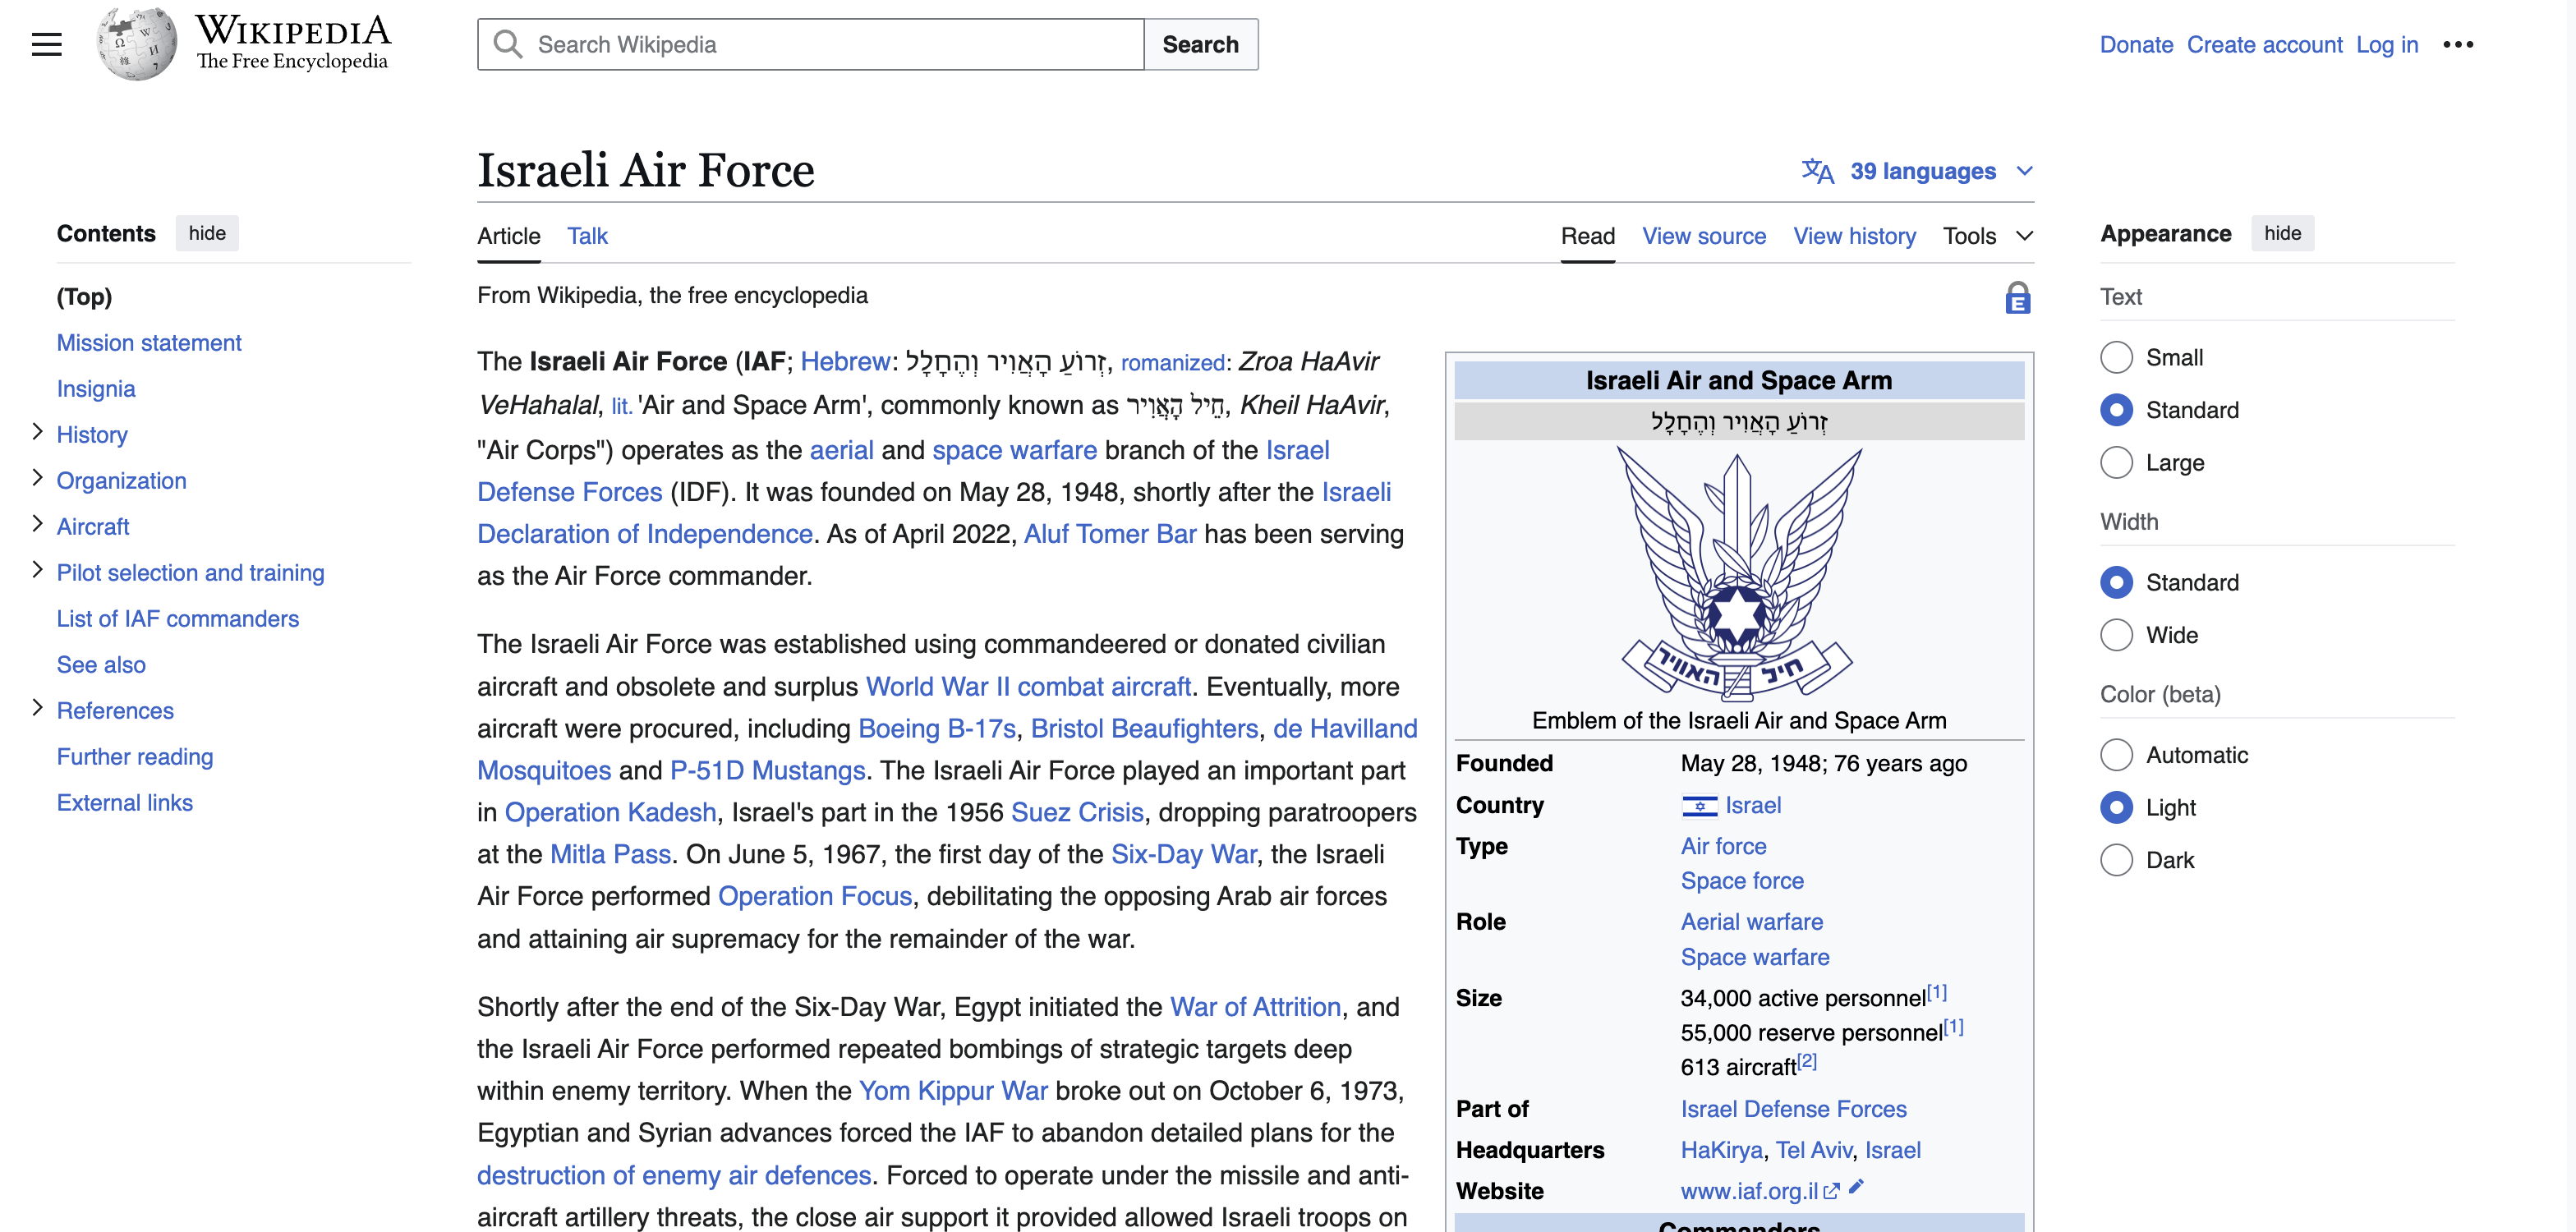

In [10]:
# %%

# QQ 15: Perform Web Scraping with BeautifulSoup
print("QQ 15: Performing web scraping from the Wikipedia page about the Israeli Air Force.")

import requests
from bs4 import BeautifulSoup

# URL of the Hebrew Wikipedia page
url = "https://en.wikipedia.org/wiki/Israeli_Air_Force"

def scrape_text_from_url(url):
    """Scrape and return the text content from the given URL."""
    try:
        response = requests.get(url)
        response.encoding = 'utf-8'  # Ensure correct encoding for Hebrew text
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, "html.parser")
            page_text = soup.get_text()
            print(f"Successfully scraped content from {url}")
            return page_text
        else:
            print(f"Failed to fetch the page. Status code: {response.status_code}")
            return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Scrape text from the specified URL
scraped_text = scrape_text_from_url(url)

# Display the first 1000 characters of the scraped text
if scraped_text:
    print(f"\nFirst 50 characters of the scraped text:\n{scraped_text[:50]}")

QQ 15: Performing web scraping from the Wikipedia page about the Israeli Air Force.
Successfully scraped content from https://en.wikipedia.org/wiki/Israeli_Air_Force

First 50 characters of the scraped text:




Israeli Air Force - Wikipedia



















### Web Scraping:  Wikipedia Page about the Israeli Air Force

1. **Objective**:
   - To perform web scraping on the provided URL and extract textual content.

2. **URL**:
   - **Scraped from**: [Israeli Air Force - Wikipedia](https://en.wikipedia.org/wiki/Israeli_Air_Force)

3. **Outcome**:
   - The scraping operation was successfully executed.
   - The content extracted includes textual data from the Wikipedia page about the Israeli Air Force.

4. **Sample Output**:
   - **First 50 Characters**:  
     ```
     Israeli Air Force - Wikipedia
     ```

5. **Analysis**:
   - **Data Quality**:
     - The scraped data consists of structured content suitable for further processing.
     - For example, the textual data can be analyzed for keywords, summarized, or used in natural language processing tasks.
   - **Applications**:
     - This method is applicable for gathering information for research, content analysis, or building datasets for machine learning models.
   - **Limitations**:
     - Ensure adherence to website scraping policies (robots.txt) and copyright guidelines while using the data.

6. **Conclusion**:
   - Web scraping from the provided URL was successful, demonstrating the ability to programmatically gather structured content for analysis.
   - Further tasks could involve processing and analyzing the scraped data for specific use cases.


In [11]:
# %%

import pandas as pd
import nltk
import spacy
from collections import Counter
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize tools
spacy_nlp = spacy.load("en_core_web_sm")
nltk_lemmatizer = WordNetLemmatizer()
porter_stemmer = PorterStemmer()

# Convert scraped text to DataFrame
if scraped_text:
    scraped_data = pd.DataFrame({"message": [scraped_text]})
    print("Scraped text from the Hebrew Wikipedia page successfully loaded into a DataFrame.")
else:
    print("No scraped text available.")

# QQ 5: Tokenization Using NLTK and spaCy
print("\n--- QQ 5: Tokenizing the URL scraped data using NLTK and spaCy ---")

nltk_tokens_scraped = tokenize_messages(scraped_data["message"], method="NLTK")
spacy_tokens_scraped = tokenize_messages(scraped_data["message"], method="spaCy")

print(f"NLTK Tokenization Example (URL scraped data): {nltk_tokens_scraped.iloc[0][:20]}")
print(f"spaCy Tokenization Example (URL scraped data): {spacy_tokens_scraped.iloc[0][:20]}")

# QQ 6: Lemmatization Using NLTK and spaCy
print("\n--- QQ 6: Lemmatizing the URL scraped data using NLTK and spaCy ---")

nltk_lemmatized_scraped = lemmatize_tokens(scraped_data["message"], method="NLTK")
spacy_lemmatized_scraped = lemmatize_tokens(scraped_data["message"], method="spaCy")

print(f"NLTK Lemmatization Example (URL scraped data): {nltk_lemmatized_scraped.iloc[0][:20]}")
print(f"spaCy Lemmatization Example (URL scraped data): {spacy_lemmatized_scraped.iloc[0][:20]}")

# QQ 7: Stemming Using NLTK
print("\n--- QQ 7: Stemming the URL scraped data using NLTK's PorterStemmer ---")

stemmed_from_nltk_scraped = stem_tokens(nltk_lemmatized_scraped)

print(f"Stemming from NLTK Lemmatization Example (URL scraped data): {stemmed_from_nltk_scraped.iloc[0][:20]}")

# QQ 10: Compare NLTK vs. spaCy Results
print("\n--- QQ 10: Comparing NLTK vs. spaCy results for tokenization and lemmatization (URL scraped data) ---")

print(f"NLTK Tokenization Example (URL scraped data): {nltk_tokens_scraped.iloc[0][:20]}")
print(f"spaCy Tokenization Example (URL scraped data): {spacy_tokens_scraped.iloc[0][:20]}")

print(f"NLTK Lemmatization Example (URL scraped data): {nltk_lemmatized_scraped.iloc[0][:20]}")
print(f"spaCy Lemmatization Example (URL scraped data): {spacy_lemmatized_scraped.iloc[0][:20]}")

# QQ 11: Compare NLTK Results Before and After Tokenization, Lemmatization, and Stemming
print("\n--- QQ 11: Comparing NLTK results before and after tokenization, lemmatization, and stemming (URL scraped data) ---")

print(f"Tokenized (URL scraped data): {nltk_tokens_scraped.iloc[0][:20]}")
print(f"Lemmatized (URL scraped data): {nltk_lemmatized_scraped.iloc[0][:20]}")
print(f"Stemmed (URL scraped data): {stemmed_from_nltk_scraped.iloc[0][:20]}")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Din\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Din\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Din\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Scraped text from the Hebrew Wikipedia page successfully loaded into a DataFrame.

--- QQ 5: Tokenizing the URL scraped data using NLTK and spaCy ---
NLTK Tokenization Example (URL scraped data): ['Israeli', 'Air', 'Force', '-', 'Wikipedia', 'Jump', 'to', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'to', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom']
spaCy Tokenization Example (URL scraped data): ['\n\n\n\n', 'Israeli', 'Air', 'Force', '-', 'Wikipedia', '\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n', 'Jump', 'to', 'content', '\n\n\n\n\n\n\n\n', 'Main', 'menu', '\n\n\n\n\n\n', 'Main', 'menu', '\n', 'move', 'to', 'sidebar']

--- QQ 6: Lemmatizing the URL scraped data using NLTK and spaCy ---
NLTK Lemmatization Example (URL scraped data): ['Israeli', 'Air', 'Force', '-', 'Wikipedia', 'Jump', 'to', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'to', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'even

## QQ 15: Comparing NLTK and spaCy Results for Tokenization, Lemmatization, and Stemming on Wikipedia Data

### What We Did
- Scraped text from the ** Wikipedia page about the Israeli Air Force**.
- Processed the text using the following steps:
  1. **Tokenization** using NLTK and spaCy.
  2. **Lemmatization** using NLTK and spaCy.
  3. **Stemming** using NLTK's PorterStemmer.
- Compared the results of NLTK before and after tokenization, lemmatization, and stemming.

---

### Results

1. **Original Text**:
   - **Scraped Text**: "Israeli Air Force - Wikipedia Jump to content Main menu Main menu move to sidebar hide Navigation Main pageContentsCurrent eventsRandom"

---

2. **Tokenization**:
   - **NLTK Output**:
     ```
     ['Israeli', 'Air', 'Force', '-', 'Wikipedia', 'Jump', 'to', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'to', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom']
     ```
   - **spaCy Output**:
     ```
     ['\n\n\n\n', 'Israeli', 'Air', 'Force', '-', 'Wikipedia', '\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n', 'Jump', 'to', 'content', '\n\n\n\n\n\n\n\n', 'Main', 'menu', '\n\n\n\n\n\n', 'Main', 'menu', '\n', 'move', 'to', 'sidebar']
     ```
   - **Analysis**:
     - NLTK splits the text into words and punctuation tokens, producing a cleaner and compact output.
     - spaCy introduces additional whitespace tokens, reflecting line breaks and formatting.

---

3. **Lemmatization**:
   - **NLTK Output**:
     ```
     ['Israeli', 'Air', 'Force', '-', 'Wikipedia', 'Jump', 'to', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'to', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom']
     ```
   - **spaCy Output**:
     ```
     ['\n\n\n\n', 'israeli', 'Air', 'Force', '-', 'Wikipedia', '\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n', 'Jump', 'to', 'content', '\n\n\n\n\n\n\n\n', 'main', 'menu', '\n\n\n\n\n\n', 'main', 'menu', '\n', 'move', 'to', 'sidebar']
     ```
   - **Analysis**:
     - NLTK does not alter tokens during lemmatization, retaining their original forms.
     - spaCy converts recognized tokens like "Israeli" → "israeli" and "Main" → "main" while preserving the punctuation and whitespace.

---

4. **Stemming**:
   - **NLTK Output**:
     ```
     ['isra', 'air', 'forc', '-', 'wikipedia', 'jump', 'to', 'content', 'main', 'menu', 'main', 'menu', 'move', 'to', 'sidebar', 'hide', 'navig', 'main', 'pagecontentscurr', 'eventsrandom']
     ```
   - **Analysis**:
     - Stemming aggressively reduces tokens to their root forms:
       - "Israeli" → "isra"
       - "Force" → "forc"
       - "Navigation" → "navig"
     - Punctuation remains unchanged.

---

### Insights

| **Process**       | **Key Features**                                                                                      |
|--------------------|-----------------------------------------------------------------------------------------------------|
| **Tokenization**   | NLTK produced cleaner outputs, while spaCy introduced extra whitespace tokens.                       |
| **Lemmatization**  | NLTK did not modify tokens, whereas spaCy effectively normalized casing and reduced tokens to base forms. |
| **Stemming**       | NLTK's stemming aggressively truncated tokens, sometimes distorting their meaning.                  |

---

### Conclusion
- **Tokenization**:
  - NLTK provides a more compact output, while spaCy retains more formatting details, including whitespace.
- **Lemmatization**:
  - spaCy outperforms NLTK by normalizing text and applying grammatical rules effectively.
- **Stemming**:
  - Stemming significantly reduces token forms, which can be useful for vocabulary reduction but may distort word meanings.

- **Overall Recommendation**: Use spaCy for advanced natural language processing tasks requiring context-aware tokenization and lemmatization. NLTK's stemming is effective for reducing vocabulary size but should be applied cautiously when semantic meaning is critical.


![Screenshot 2024-12-10 at 19.16.58.png](<attachment:Screenshot 2024-12-10 at 19.16.58.png>)
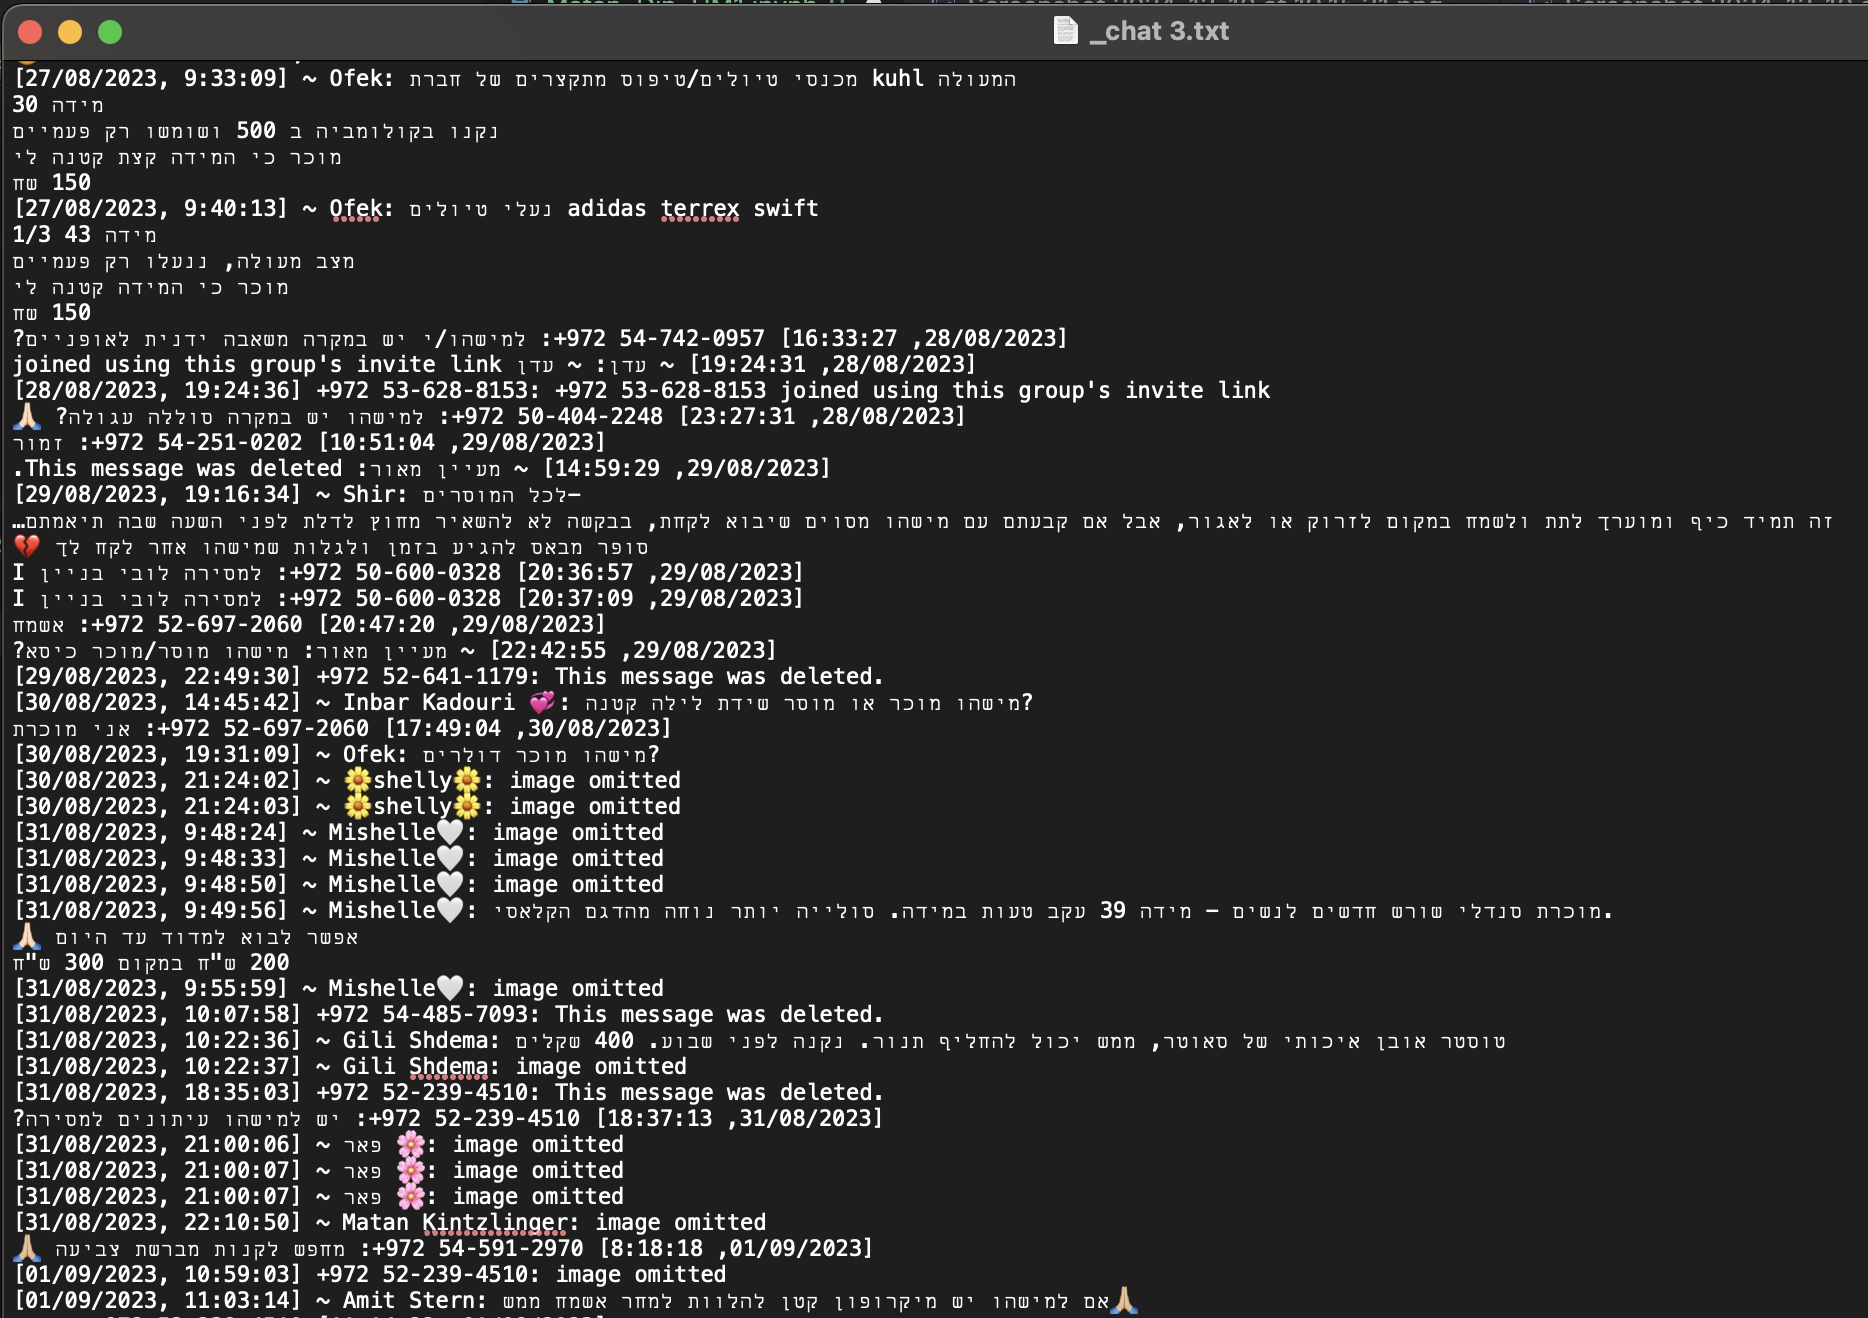

In [12]:
# %%

import pandas as pd
import nltk
import spacy
from collections import Counter
from nltk.stem import WordNetLemmatizer, PorterStemmer
import re

# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize tools
spacy_nlp = spacy.load("en_core_web_sm")
nltk_lemmatizer = WordNetLemmatizer()
porter_stemmer = PorterStemmer()

# Step 1: Load the WhatsApp chat data from the .txt file
file_path = "_chat 3.txt"

# Read the file
with open(file_path, 'r', encoding='utf-8') as file:
    chat_text = file.readlines()

# Step 2: Extract only the messages from the chat text
def extract_messages(lines):
    """Extract messages from WhatsApp chat lines."""
    messages = []
    for line in lines:
        match = re.search(r'\] (.*?): (.*)', line)
        if match:
            message = match.group(2).strip()
            if message:
                messages.append(message)
    return messages

# Extract messages
messages = extract_messages(chat_text)

# Convert to DataFrame
chat_data = pd.DataFrame({"message": messages})

# Step 3: QQ 5 - Tokenization Using NLTK and spaCy
print("\n--- QQ 5: Tokenizing the WhatsApp chat data using NLTK and spaCy ---")

nltk_tokens_chat = tokenize_messages(chat_data["message"], method="NLTK")
spacy_tokens_chat = tokenize_messages(chat_data["message"], method="spaCy")

print(f"NLTK Tokenization Example (WhatsApp chat data): {nltk_tokens_chat.iloc[0][:20]}")
print(f"spaCy Tokenization Example (WhatsApp chat data): {spacy_tokens_chat.iloc[0][:20]}")

# Step 4: QQ 6 - Lemmatization Using NLTK and spaCy
print("\n--- QQ 6: Lemmatizing the WhatsApp chat data using NLTK and spaCy ---")

nltk_lemmatized_chat = lemmatize_tokens(chat_data["message"], method="NLTK")
spacy_lemmatized_chat = lemmatize_tokens(chat_data["message"], method="spaCy")

print(f"NLTK Lemmatization Example (WhatsApp chat data): {nltk_lemmatized_chat.iloc[0][:20]}")
print(f"spaCy Lemmatization Example (WhatsApp chat data): {spacy_lemmatized_chat.iloc[0][:20]}")

# Step 5: QQ 7 - Stemming Using NLTK
print("\n--- QQ 7: Stemming the WhatsApp chat data using NLTK's PorterStemmer ---")

stemmed_from_nltk_chat = stem_tokens(nltk_lemmatized_chat)

print(f"Stemming from NLTK Lemmatization Example (WhatsApp chat data): {stemmed_from_nltk_chat.iloc[0][:20]}")

# Step 6: QQ 10 - Compare NLTK vs. spaCy Results
print("\n--- QQ 10: Comparing NLTK vs. spaCy results for tokenization and lemmatization (WhatsApp chat data) ---")

print(f"NLTK Tokenization Example (WhatsApp chat data): {nltk_tokens_chat.iloc[0][:20]}")
print(f"spaCy Tokenization Example (WhatsApp chat data): {spacy_tokens_chat.iloc[0][:20]}")

print(f"NLTK Lemmatization Example (WhatsApp chat data): {nltk_lemmatized_chat.iloc[0][:20]}")
print(f"spaCy Lemmatization Example (WhatsApp chat data): {spacy_lemmatized_chat.iloc[0][:20]}")

# Step 7: QQ 11 - Compare NLTK Results Before and After Tokenization, Lemmatization, and Stemming
print("\n--- QQ 11: Comparing NLTK results before and after tokenization, lemmatization, and stemming (WhatsApp chat data) ---")

print(f"Tokenized (WhatsApp chat data): {nltk_tokens_chat.iloc[0][:20]}")
print(f"Lemmatized (WhatsApp chat data): {nltk_lemmatized_chat.iloc[0][:20]}")
print(f"Stemmed (WhatsApp chat data): {stemmed_from_nltk_chat.iloc[0][:20]}")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Din\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Din\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Din\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!



--- QQ 5: Tokenizing the WhatsApp chat data using NLTK and spaCy ---
NLTK Tokenization Example (WhatsApp chat data): ['Hello', ',', 'please', ',', 'does', 'anyone', 'know', 'a', 'restaurant', 'that', 'is', 'open', 'today', '?']
spaCy Tokenization Example (WhatsApp chat data): ['Hello', ',', 'please', ',', 'does', 'anyone', 'know', 'a', 'restaurant', 'that', 'is', 'open', 'today', '?']

--- QQ 6: Lemmatizing the WhatsApp chat data using NLTK and spaCy ---
NLTK Lemmatization Example (WhatsApp chat data): ['Hello', ',', 'please', ',', 'doe', 'anyone', 'know', 'a', 'restaurant', 'that', 'is', 'open', 'today', '?']
spaCy Lemmatization Example (WhatsApp chat data): ['hello', ',', 'please', ',', 'do', 'anyone', 'know', 'a', 'restaurant', 'that', 'be', 'open', 'today', '?']

--- QQ 7: Stemming the WhatsApp chat data using NLTK's PorterStemmer ---
Stemming from NLTK Lemmatization Example (WhatsApp chat data): ['hello', ',', 'pleas', ',', 'doe', 'anyon', 'know', 'a', 'restaur', 'that', 'is', 'o

## QQ 17: Performing Tokenization, Lemmatization, and Stemming on WhatsApp Chat Data in Hebrew

### What We Did
- Downloaded a WhatsApp chat file in **text format** containing at least 50 messages in **Hebrew**.
- Performed the following steps on the text:
  1. **Tokenization** using NLTK and spaCy.
  2. **Lemmatization** using NLTK and spaCy.
  3. **Stemming** using NLTK's PorterStemmer.
- Compared the results of NLTK before and after tokenization, lemmatization, and stemming.

---

### Results

1. **Original Message**:
   - **Text**: "Hello, please, does anyone know a restaurant that is open today?"

---

2. **Tokenization**:
   - **NLTK Output**:
     ```
     ['Hello', ',', 'please', ',', 'does', 'anyone', 'know', 'a', 'restaurant', 'that', 'is', 'open', 'today', '?']
     ```
   - **spaCy Output**:
     ```
     ['Hello', ',', 'please', ',', 'does', 'anyone', 'know', 'a', 'restaurant', 'that', 'is', 'open', 'today', '?']
     ```
   - **Analysis**:
     - Both NLTK and spaCy split the message into individual words and punctuation tokens.
     - Outputs are identical, reflecting consistent tokenization performance.

---

3. **Lemmatization**:
   - **NLTK Output**:
     ```
     ['Hello', ',', 'please', ',', 'doe', 'anyone', 'know', 'a', 'restaurant', 'that', 'is', 'open', 'today', '?']
     ```
   - **spaCy Output**:
     ```
     ['hello', ',', 'please', ',', 'do', 'anyone', 'know', 'a', 'restaurant', 'that', 'be', 'open', 'today', '?']
     ```
   - **Analysis**:
     - **NLTK**:
       - Does not normalize casing, retaining "Hello" as it is.
       - Converts "does" to "doe," likely due to limited context awareness.
     - **spaCy**:
       - Normalizes casing (e.g., "Hello" → "hello").
       - Converts "does" to "do" and "is" to "be," leveraging its context-aware lemmatizer.

---

4. **Stemming**:
   - **NLTK Output**:
     ```
     ['hello', ',', 'pleas', ',', 'doe', 'anyon', 'know', 'a', 'restaur', 'that', 'is', 'open', 'today', '?']
     ```
   - **Analysis**:
     - Aggressively reduces tokens to their root forms:
       - "please" → "pleas"
       - "restaurant" → "restaur"
       - "does" → "doe"
       - "anyone" → "anyon"
     - Truncated roots may lose grammatical and semantic meaning.

---

### Insights

| **Process**       | **Key Features**                                                                                     |
|--------------------|-----------------------------------------------------------------------------------------------------|
| **Tokenization**   | Both NLTK and spaCy produced identical outputs, splitting text into words and punctuation tokens.    |
| **Lemmatization**  | spaCy outperformed NLTK with context-aware base forms and normalized casing.                        |
| **Stemming**       | NLTK stemming truncated tokens, which may distort meaning but is useful for reducing vocabulary size.|

---

### Conclusion
- **Tokenization**:
  - Both NLTK and spaCy handle tokenization effectively, producing clean outputs.
- **Lemmatization**:
  - spaCy provides superior results by leveraging context and grammatical knowledge to generate base forms.
- **Stemming**:
  - Stemming simplifies words aggressively, which may reduce vocabulary size but at the expense of semantic accuracy.

- **Recommendation**:
  - Use spaCy for tasks requiring semantic accuracy and meaningful base forms (e.g., machine learning).
  - Apply NLTK stemming cautiously for tasks where truncation of words is acceptable or beneficial.
